In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('Data_Set/symptom.csv')

In [3]:
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(246945, 378)

In [5]:
df.groupby('diseases').max().reset_index()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,abdominal aortic aneurysm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abdominal hernia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abscess of nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abscess of the lung,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abscess of the pharynx,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,white blood cell disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,whooping cough,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,wilson disease,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
771,yeast infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1=pd.read_csv('Data_Set/alphabetic_data.csv')

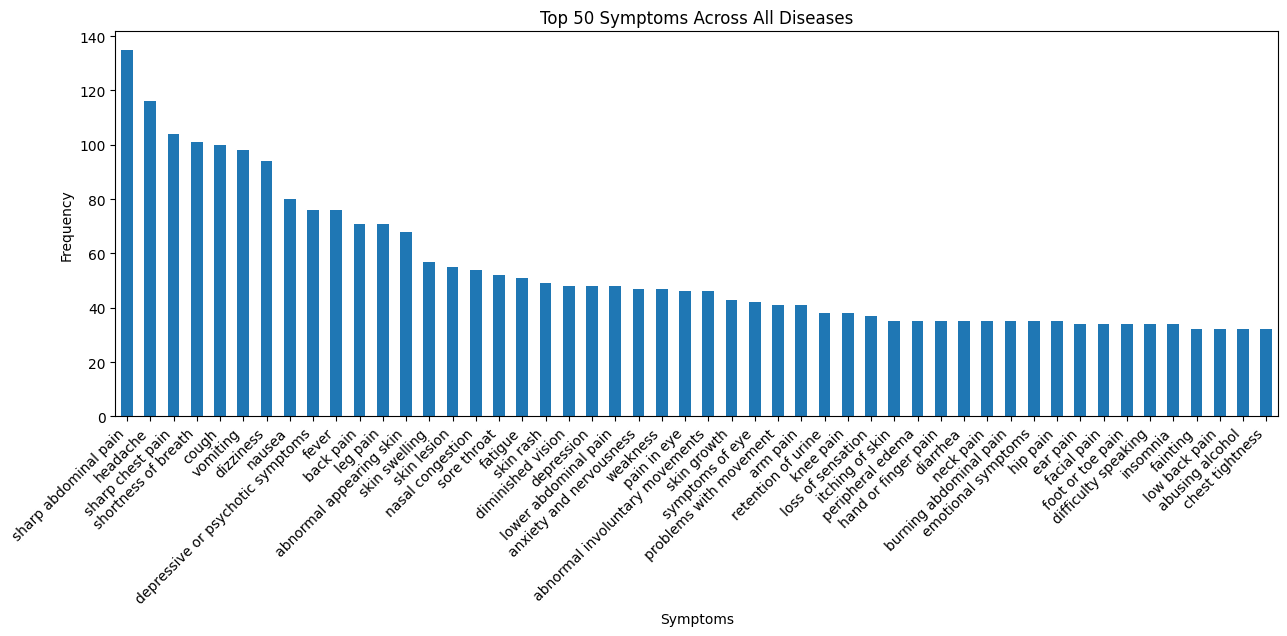

In [9]:
# Sum the occurrence of each symptom across all diseases
symptom_counts = df1.iloc[:, 1:].sum()

# Display only the top 20 symptoms
top_symptoms = symptom_counts.sort_values(ascending=False).head(50)
top_symptoms.plot(kind='bar', figsize=(15, 5))
plt.title("Top 50 Symptoms Across All Diseases")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
numerical_columns = df1.select_dtypes(exclude=['category', 'object']).columns

In [35]:
X = df1.iloc[:, 1:]  # Features (symptoms)
y = df1['diseases']  # Target (disease)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X_train), len(y_train)

(618, 618)

In [8]:
len(X_test), len(y_test)

(155, 155)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
                                                 precision    recall  f1-score   support

                      abdominal aortic aneurysm       0.00      0.00      0.00       0.0
                               abdominal hernia       0.00      0.00      0.00       0.0
                                abscess of nose       0.00      0.00      0.00       1.0
                                      achalasia       0.00      0.00      0.00       1.0
                            acute bronchiolitis       0.00      0.00      0.00       1.0
                               acute bronchitis       0.00      0.00      0.00       0.0
                             acute bronchospasm       0.00      0.00      0.00       0.0
          acute fatty liver of pregnancy (aflp)       0.00      0.00      0.00       0.0
                                acute sinusitis       0.00      0.00      0.00       0.0
                                adrenal adenoma       0.00      0.00    

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\m

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [13]:
clf_dt.score(X, y)

0.9961190168175937

In [14]:
disease_pred = clf_dt.predict(X)

In [15]:
disease_real = y.values

In [16]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: dislocation of the knee
Actual: dislocation of the patella

Pred: heart contusion
Actual: kaposi sarcoma

Pred: open wound of the finger
Actual: open wound of the hand



In [17]:
# Check the unique values in the target variable
print(y.value_counts())

diseases
abdominal aortic aneurysm        1
obstructive sleep apnea (osa)    1
oral leukoplakia                 1
oral mucosal lesion              1
oral thrush (yeast infection)    1
                                ..
fracture of the arm              1
fracture of the facial bones     1
fracture of the finger           1
fracture of the foot             1
zenker diverticulum              1
Name: count, Length: 773, dtype: int64


In [18]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.0


In [24]:
!pip install xgboost

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming `y` is your target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts string labels to integers

In [38]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

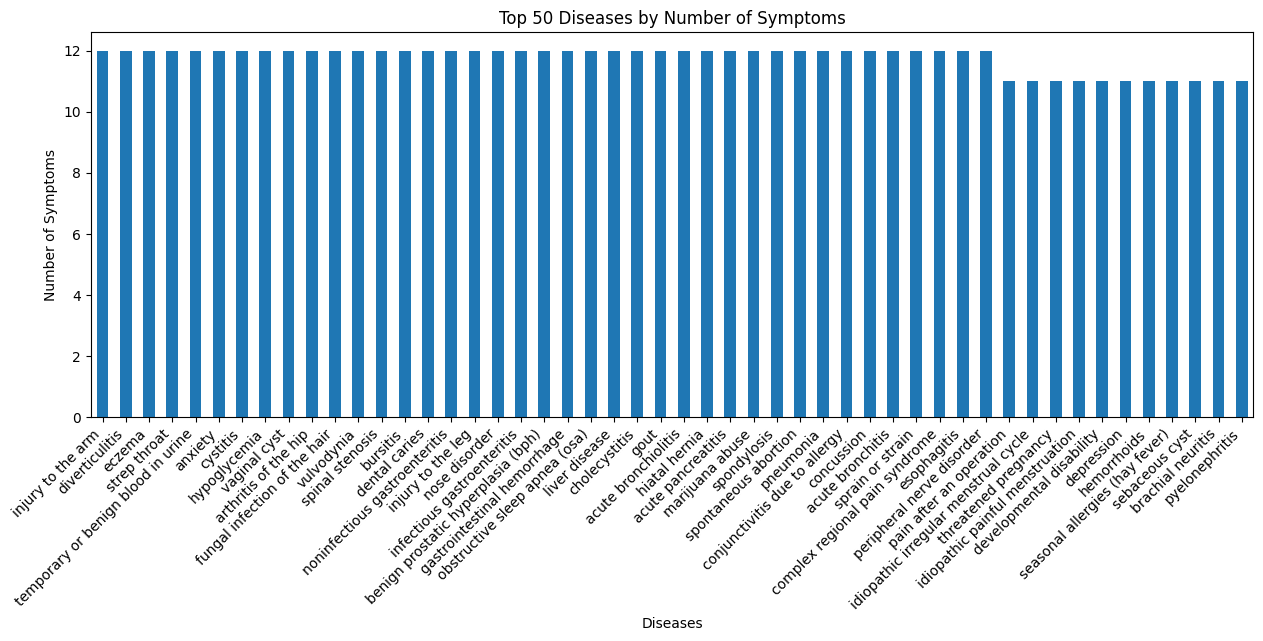

In [12]:
# Calculate the number of symptoms for each disease
disease_symptom_counts = df1.iloc[:, 1:].sum(axis=1)  # Sum across symptom columns
disease_symptom_counts.index = df1['diseases']  # Set disease names as index

# Sort the counts in descending order and select the top 50
top_50_diseases = disease_symptom_counts.sort_values(ascending=False).head(50)

# Plot the distribution for the top 50 diseases
plt.figure(figsize=(15, 5))
top_50_diseases.plot(kind='bar', title="Top 50 Diseases by Number of Symptoms")
plt.xlabel("Diseases")
plt.ylabel("Number of Symptoms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [13]:
X = df1.iloc[:, 1:]  # Symptoms
y = df1['diseases']  # Disease labels

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          49       0.00    

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\m

In [18]:
print(y.nunique())  # Check the number of unique classes
print(y.value_counts())  # Check for class imbalance


773
diseases
abdominal aortic aneurysm        1
obstructive sleep apnea (osa)    1
oral leukoplakia                 1
oral mucosal lesion              1
oral thrush (yeast infection)    1
                                ..
fracture of the arm              1
fracture of the facial bones     1
fracture of the finger           1
fracture of the foot             1
zenker diverticulum              1
Name: count, Length: 773, dtype: int64


In [19]:
print(X.describe())  # Get descriptive statistics of the symptom columns
print(X.sum(axis=1).value_counts())  # Check how many symptoms each disease typically has

       anxiety and nervousness  depression  shortness of breath  \
count               773.000000  773.000000           773.000000   
mean                  0.060802    0.062096             0.130660   
std                   0.239122    0.241486             0.337246   
min                   0.000000    0.000000             0.000000   
25%                   0.000000    0.000000             0.000000   
50%                   0.000000    0.000000             0.000000   
75%                   0.000000    0.000000             0.000000   
max                   1.000000    1.000000             1.000000   

       depressive or psychotic symptoms  sharp chest pain   dizziness  \
count                        773.000000        773.000000  773.000000   
mean                           0.098318          0.134541    0.121604   
std                            0.297937          0.341453    0.327040   
min                            0.000000          0.000000    0.000000   
25%                            

In [20]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:, 1:]  # Features (all columns except 'Diseases')
y = df1['diseases']  # Labels (the disease column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Select features with importances greater than a threshold (e.g., 0.01)
selector = SelectFromModel(model, threshold=0.01)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you've already split your data into training and testing sets and done feature selection
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test data
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.0000
                                                 precision    recall  f1-score   support

                                abscess of nose       0.00      0.00      0.00       1.0
                                      achalasia       0.00      0.00      0.00       1.0
                            acute bronchiolitis       0.00      0.00      0.00       1.0
                                adrenal adenoma       0.00      0.00      0.00       1.0
                             alcohol withdrawal       0.00      0.00      0.00       0.0
                             allergy to animals       0.00      0.00      0.00       1.0
                                       alopecia       0.00      0.00      0.00       1.0
                                      amblyopia       0.00      0.00      0.00       1.0
           anemia due to chronic kidney disease       0.00      0.00      0.00       1.0
                                   appendicitis       0.00      0.00      0.00       1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\m